<a href="https://colab.research.google.com/github/steveding1/DA-learning/blob/master/filght_arr_dep_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib.dates import HourLocator

In [77]:
data = pd.read_html('C033.html')[3][2:][['Date','Aircraft','Departure','Arrival','Duration']]
data.set_index('Date',inplace=True)
data

,Aircraft,Departure,Arrival,Duration
Date,,,,
2022-Nov-27,B77L,11:47PM PST,09:58AM AEDT (+2),15:10
2022-Nov-26,B77L,11:32PM PST,10:27AM AEDT (+2),15:54
2022-Nov-26,B77L,01:55AM PST,11:58AM AEDT (+1),15:02
2022-Nov-25,B77L,12:05AM PST,10:29AM AEDT (+1),15:23
2022-Nov-23,B77L,11:21PM PST,09:47AM AEDT (+2),15:25
...,...,...,...,...
2022-Sep-02,B789,01:03AM PDT,08:46AM AEST (+1),14:42
2022-Aug-31,B789,11:35PM PDT,07:25AM AEST (+2),14:49
2022-Aug-31,B789,12:54AM PDT,09:10AM AEST (+1),15:16


In [78]:
data.value_counts('Aircraft')

Aircraft
B77L    79
B789     8
B77W     5
dtype: int64

In [79]:
data['Arrival'] = data.Arrival.str.slice(0,-10)
data['Arrival'] = pd.to_datetime(data['Arrival'] ,format= '%I:%M%p')
arrives = data['Arrival']
arrives.index = pd.date_range(end='2022-Nov-27',  periods=92)[::-1]
arrives = arrives.to_frame()

In [80]:
data['Departure'] = data.index + ' ' + data.Departure.str.slice(0,-4)
data['Departure'] = pd.to_datetime(data['Departure'])
data['Departure']

Date
2022-Nov-27   2022-11-27 23:47:00
2022-Nov-26   2022-11-26 23:32:00
2022-Nov-26   2022-11-26 01:55:00
2022-Nov-25   2022-11-25 00:05:00
2022-Nov-23   2022-11-23 23:21:00
                      ...        
2022-Sep-02   2022-09-02 01:03:00
2022-Aug-31   2022-08-31 23:35:00
2022-Aug-31   2022-08-31 00:54:00
2022-Aug-29   2022-08-29 23:42:00
2022-Aug-29   2022-08-29 00:00:00
Name: Departure, Length: 92, dtype: datetime64[ns]

In [81]:
departures = data['Departure'].to_frame()
departures.index = pd.date_range(end='2022-Nov-27',  periods=92)[::-1]
departures

,Departure
2022-11-27,2022-11-27 23:47:00
2022-11-26,2022-11-26 23:32:00
2022-11-25,2022-11-26 01:55:00
2022-11-24,2022-11-25 00:05:00
2022-11-23,2022-11-23 23:21:00
...,...
2022-09-01,2022-09-02 01:03:00
2022-08-31,2022-08-31 23:35:00
2022-08-30,2022-08-31 00:54:00
2022-08-29,2022-08-29 23:42:00


In [82]:
departures['Departure'] = (departures['Departure'] + pd.DateOffset(hours=4)).astype(str)
departures['Departure'] = pd.to_datetime(departures['Departure'].str.slice(11) ,format= '%H:%M:%S')

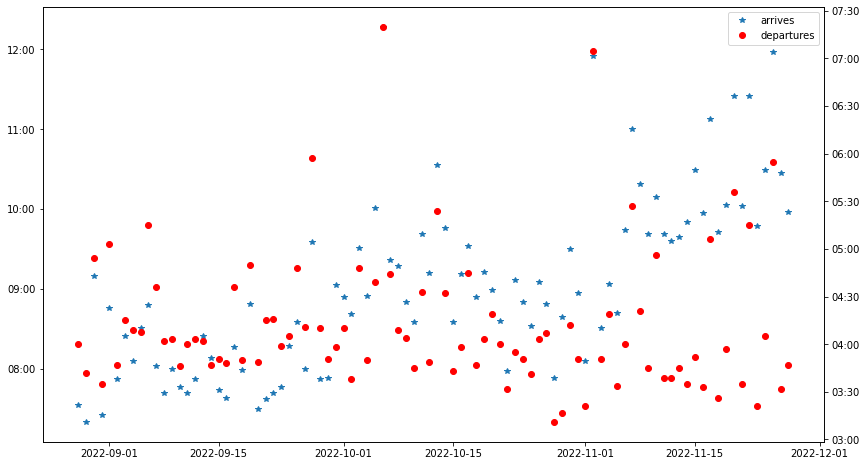

In [83]:
fig, ax1 = plt.subplots(figsize=(14, 8))
ax2 = ax1.twinx()
ax1.yaxis.set_major_formatter(DateFormatter("%H:%M"))
ax1.xaxis.set_major_formatter(DateFormatter("%m-%d"))
ax2.yaxis.set_major_formatter(DateFormatter("%H:%M"))
dot1, = ax1.plot_date(arrives.index,arrives.Arrival,xdate=True, ydate=1, marker='*', label='arrives')
dot2, = ax2.plot_date(departures.index,departures.Departure, xdate=True, ydate=1, color='r', label='departures')
ax1.legend(handles=[dot1, dot2])
plt.grid(axis='x',which='both')
plt.show()